# **Principal Component Analysis (PCA)**

* It is a dimensionality reduction technique that transforms a dataset with correlated variables into a set of lineraly uncorrelated variables called principal components. The goal is to reduce the number of features while preserving as much variance as possible.

* It reduces the number of dimensions in large datasets to principal components that retain most of the original information.

* PCA is commonly used for data preprocessing for use with machine learning algorithms. It can extract the most informative features from large datasets while preserving the most relevant information from the initial dataset.

* PCA reduces dimensionality to improve computational efficiency, helps in visualizing high-dimensional data, removes redudancy in correlated features, and reduces overfitting by eliminating less significant features.

**How PCA works:**

**1) Standardize data**

- Since PCA is affected by different feature scales, we first normalize the data to have mean of 0 and variance of 1.

**2) Compute the covariance matrix**

- The covariance matrix captures the relationships between features.

**3) Compute eigenvalues and eigenvectors**

- Eigenvalues represent the magnitude of variance in particular direction;
- Eigenvectors represent the directions (principal components) in which variance is maximum.

**4) Sort eigenvectors by eigenvalues**

- The eigenvectors with the highest eigenvalues correspon to the most important principal components.

**5) Project the data onto the principal components**

- The data is transformed into a new coordinate system defined by selected principal components.



# **Implementation of PCA from scratch in Python**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

**Generate the data**

In [2]:
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

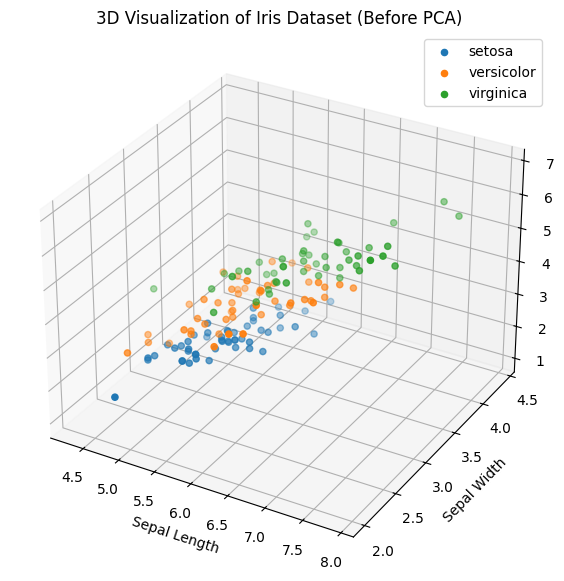

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each class
for i, target_name in enumerate(iris.target_names):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], label=target_name)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title("3D Visualization of Iris Dataset (Before PCA)")
ax.legend()
plt.show()

**Compute the covariance matrix**

In [3]:
cov_matrix = np.cov(X_standardized.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


**Compute eigenvalues and eigenvectors**

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Select the principal components**

In [5]:
# Sort eigenvalues and eigenvectors in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top 2 eigenvectors
num_components = 2
top_eigenvectors = eigenvectors[:, :num_components]

In [6]:
# Project the data onto the top 2 principal components
X_pca = X_standardized.dot(top_eigenvectors)
print("Transformed Data (First 5 samples):\n", X_pca[:5])

Transformed Data (First 5 samples):
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


**Visualization of PCA**

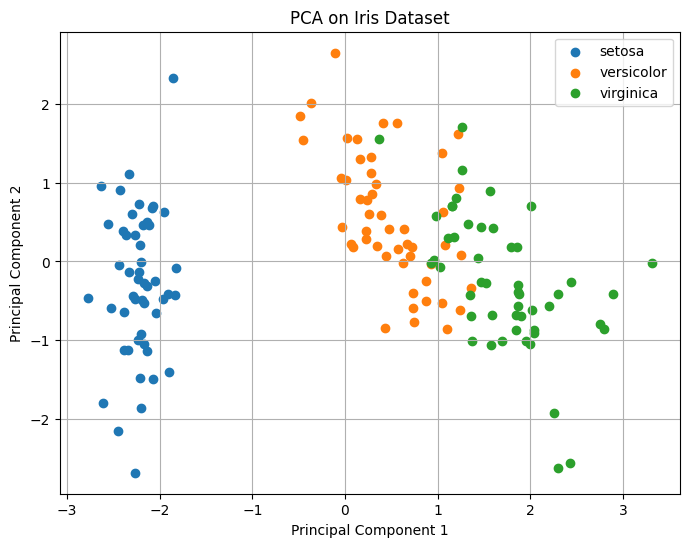

In [7]:
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset")
plt.legend()
plt.grid()
plt.show()